In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22372\3810907375.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [3]:
sanbul = pd.read_csv('C:\project22\python\sanbul_rank_group30.csv', encoding = 'euc-kr')

sanbul.drop(['Unnamed: 0'], axis = 1, inplace=True)

condition = (sanbul.group == 1)
sanbul = sanbul[condition]

In [4]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

# wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
# wether_2.drop(['지점'], axis=1, inplace=True)

# index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']
# wether_2.columns = index_name

wether.loc[wether['stnNm'] == '정선군', 'stnNm'] = '정선'

C:\Users\user\AppData\Local\Temp\ipykernel_22372\1705054059.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [5]:
# wether_concat = pd.concat([wether, wether_2])

In [6]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul['day_place'] = sanbul['tm'] + sanbul['발생장소_시군구']
wether['day_place'] = wether['tm'] + wether['stnNm']

# 데이터 합치기
sanbul_wether = pd.merge(wether, sanbul, on = 'day_place')

sanbul_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

In [7]:
# 발생월, 시도 추출 = 03경북, 04강원, 03강원
# sanbul_wether['month_count'] = str(sanbul_wether['발생일시_월']) + sanbul_wether['발생장소_시도']

# 기준년월과 지역 코드 합친 기준열 만들기
# for i in range(len(sanbul_wether)):
#     day = str(sanbul_wether.loc[i, '발생일시_월'])
#     place = sanbul_wether.loc[i, '발생장소_시도']
#     sanbul_wether.loc[i, 'month_count'] = day + place


# condition = (sanbul_wether.month_count == '3경북') | (sanbul_wether.month_count == '4강원') | (sanbul_wether.month_count == '3강원')
# sanbul_high = sanbul_wether[condition]

# condition = (sanbul_wether.발생일시_월 == 2) | (sanbul_wether.발생일시_월 == 3) | (sanbul_wether.발생일시_월 == 4)| (sanbul_wether.발생일시_월 == 5)
# sanbul_high = sanbul_wether[condition]

In [8]:
# sanbul_high.to_csv('./sanbul_high.csv', encoding = 'euc-kr')

In [9]:
df = sanbul_wether.dropna(axis = 1)

In [10]:
# sanbul_wether.groupby('mounth')
# sanbul_high.groupby('month_count').agg(["min", "mean", "std", "max"])
# weather_g = df.groupby('month_count').agg(["mean"])
# count_g = df.groupby('month_count').count()

# count_df = count_g[['avgTa']]
# count_df.columns = ['count']

# df_new = pd.concat([weather_g, count_df], axis=1)
# df_new

In [11]:
df.columns

Index(['stnNm', 'tm_x', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'avgTs', 'minTg', 'day_place',
       'tm_y', '발생일시_시간', '발생장소_시도', '발생장소_시군구', '발생원인_구분', 'damaged_area',
       'hour', 'min', 'time', 'rank', 'radio', 'cumulative', 'group'],
      dtype='object')

In [20]:
df_new = df[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'avgTs', 'minTg', 'damaged_area']]

df_new.dropna(inplace=True)
# df_area = df[]

C:\Users\user\AppData\Local\Temp\ipykernel_22372\3337335300.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [21]:
df_new.corr()

,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,...,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,avgTs,minTg,damaged_area
avgTa,1.000000,0.906162,-0.146062,0.942274,-0.167006,0.236961,-0.380962,0.454300,0.292719,-0.062267,...,-0.570071,-0.307049,-0.592541,0.487821,-0.589945,0.671336,0.343308,0.880401,0.828890,0.127313
minTa,0.906162,1.000000,-0.024883,0.733127,-0.144455,0.412273,-0.201084,0.427967,0.466370,0.023580,...,-0.559755,-0.182365,-0.574399,0.320493,-0.573975,0.637571,0.289644,0.854843,0.929622,0.237927
minTaHrmt,-0.146062,-0.024883,1.000000,-0.188093,-0.347164,0.191630,0.116869,-0.108848,0.194421,-0.200340,...,-0.236396,0.377454,-0.243406,-0.326533,-0.247943,-0.359825,-0.463721,-0.221919,0.051989,-0.095216
maxTa,0.942274,0.733127,-0.188093,1.000000,-0.134057,0.044054,-0.468772,0.418067,0.087694,-0.148432,...,-0.517151,-0.270548,-0.539814,0.529586,-0.534649,0.604612,0.322927,0.788068,0.665416,0.025424
maxTaHrmt,-0.167006,-0.144455,-0.347164,-0.134057,1.000000,-0.384343,-0.175808,-0.475595,-0.428694,0.210973,...,0.224509,0.095892,0.239320,-0.147449,0.229630,0.170115,0.178232,0.012159,-0.059108,0.052640
maxInsWs,0.236961,0.412273,0.191630,0.044054,-0.384343,1.000000,0.332906,0.194807,0.976547,-0.042896,...,-0.491409,-0.177435,-0.505344,0.113235,-0.509353,0.180215,0.024122,0.129561,0.451004,0.500076
maxInsWsWd,-0.380962,-0.201084,0.116869,-0.468772,-0.175808,0.332906,1.000000,-0.114362,0.280319,0.476712,...,-0.126154,0.130517,0.010174,-0.194819,-0.040612,-0.364116,-0.135087,-0.343021,-0.243840,0.103397
maxInsWsHrmt,0.454300,0.427967,-0.108848,0.418067,-0.475595,0.194807,-0.114362,1.000000,0.274435,0.013255,...,-0.275450,-0.476538,-0.325751,0.503878,-0.295625,-0.048548,-0.114651,0.212503,0.351263,0.240527
maxWs,0.292719,0.466370,0.194421,0.087694,-0.428694,0.976547,0.280319,0.274435,1.000000,-0.050270,...,-0.510978,-0.226392,-0.553638,0.168776,-0.548014,0.139388,0.037814,0.145670,0.508326,0.471894
maxWsWd,-0.062267,0.023580,-0.200340,-0.148432,0.210973,-0.042896,0.476712,0.013255,-0.050270,1.000000,...,-0.015707,-0.171680,0.041751,-0.178654,0.046579,-0.084471,0.216680,-0.019905,-0.081986,0.066209


<AxesSubplot:>

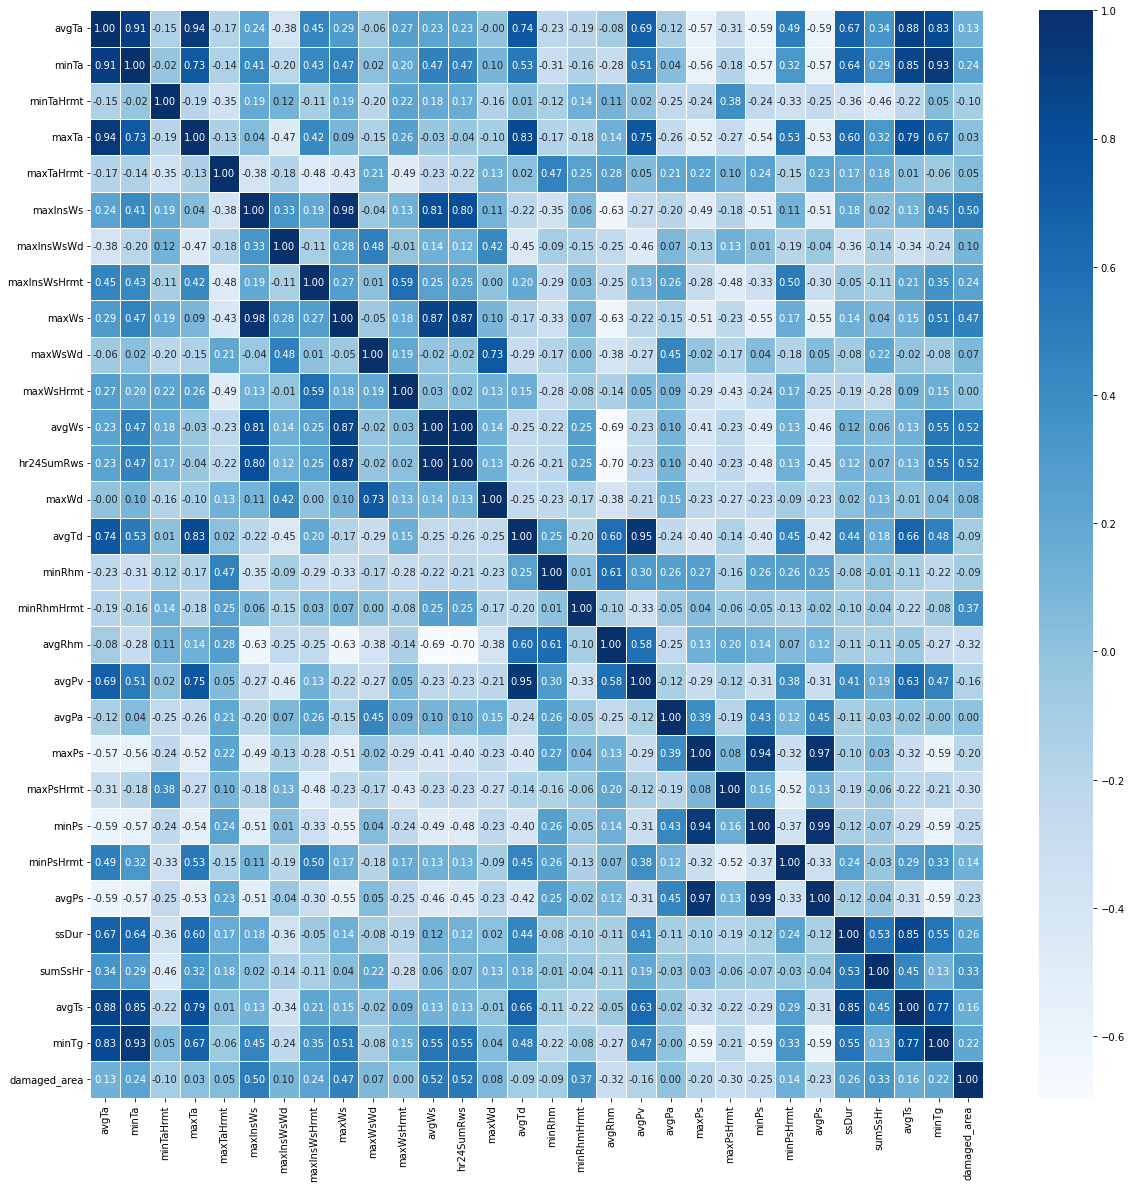

In [22]:
# 히트맵 그려보기
plt.figure(figsize=(20, 20))
sns.heatmap(data = df_new.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [15]:
# df_new_drop.loc[['(rank, mean)']]
# df_new_drop.iloc[:,-11:-2]
# df_new_drop.iloc[:,0:48]
# df_new_drop.iloc[:, [-1]]

In [16]:
# df_new_drop_drop = df_new_drop.iloc[:,0:48]
# df_new_drop_drop = pd.concat([df_new_drop.iloc[:,0:48], df_new_drop.iloc[:, [-1]]], axis=1)
# 상관분석
# df.corr()

In [17]:
# # 히트맵 그려보기
# plt.figure(figsize=(25, 25))
# sns.heatmap(data = df.corr(), annot = True
#             , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [18]:
# weather_final = weather_g.dropna()
# sanbul_corr_mean = weather_final
# sanbul_corr_mean

In [19]:
# count_g.isnull().count()